In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('Data_clean.csv')
print(data.columns)

Index(['accident_index', 'speed_limit', 'urban_or_rural_area',
       'local_authority_name', 'accident_count', 'traffic_flow',
       'accident_rate', 'population_density', 'mean_income_of_tax_payers',
       'total_road_length', 'Inland_Area', 'Road_Network_Density',
       'Signal_Count', 'Driving_Distance'],
      dtype='object')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accident_index             22883 non-null  float64
 1   speed_limit                22883 non-null  int64  
 2   urban_or_rural_area        22883 non-null  int64  
 3   local_authority_name       22883 non-null  object 
 4   accident_count             22883 non-null  int64  
 5   traffic_flow               22883 non-null  int64  
 6   accident_rate              22883 non-null  float64
 7   population_density         22883 non-null  float64
 8   mean_income_of_tax_payers  22236 non-null  float64
 9   total_road_length          22883 non-null  float64
 10  Inland_Area                22883 non-null  float64
 11  Road_Network_Density       22883 non-null  float64
 12  Signal_Count               22711 non-null  float64
 13  Driving_Distance           22883 non-null  int

In [4]:
# 删除不需要的列
columns_to_drop = ['accident_index', 'speed_limit', 'urban_or_rural_area', 'total_road_length', 'Inland_Area']
df_cleaned = data.drop(columns=columns_to_drop)

# 按 'local_authority_name' 去除重复行，保留每个区域的唯一记录
df_unique = df_cleaned.drop_duplicates(subset='local_authority_name')

# 查看结果
print(df_unique.head())

      local_authority_name  accident_count  traffic_flow  accident_rate  \
0     Barking and Dagenham             442        332152       0.001331   
442                 Barnet             829       1421345       0.000583   
1271                Bexley             395        817061       0.000483   
1666                 Brent             934        701496       0.001331   
2600               Bromley             598        631376       0.000947   

      population_density  mean_income_of_tax_payers  Road_Network_Density  \
0                 6286.4                    31800.0              5.896200   
442               4821.9                    59100.0              5.486005   
1271              4295.6                    38000.0              5.645334   
1666              8112.3                    44100.0              6.668517   
2600              2299.4                    54500.0              3.781264   

      Signal_Count  Driving_Distance  
0            454.0               634  
442     

In [5]:
# 使用 .loc 进行操作
df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100

/tmp/ipykernel_63120/2418590600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:, 'accident_rate_percentage'] = df_unique['accident_rate'] * 100


In [6]:
df_unique = df_unique.drop(columns = ['local_authority_name','accident_rate','accident_count'])

In [7]:
df_unique = df_unique.dropna()

In [8]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 21653
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   traffic_flow               30 non-null     int64  
 1   population_density         30 non-null     float64
 2   mean_income_of_tax_payers  30 non-null     float64
 3   Road_Network_Density       30 non-null     float64
 4   Signal_Count               30 non-null     float64
 5   Driving_Distance           30 non-null     int64  
 6   accident_rate_percentage   30 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 1.9 KB


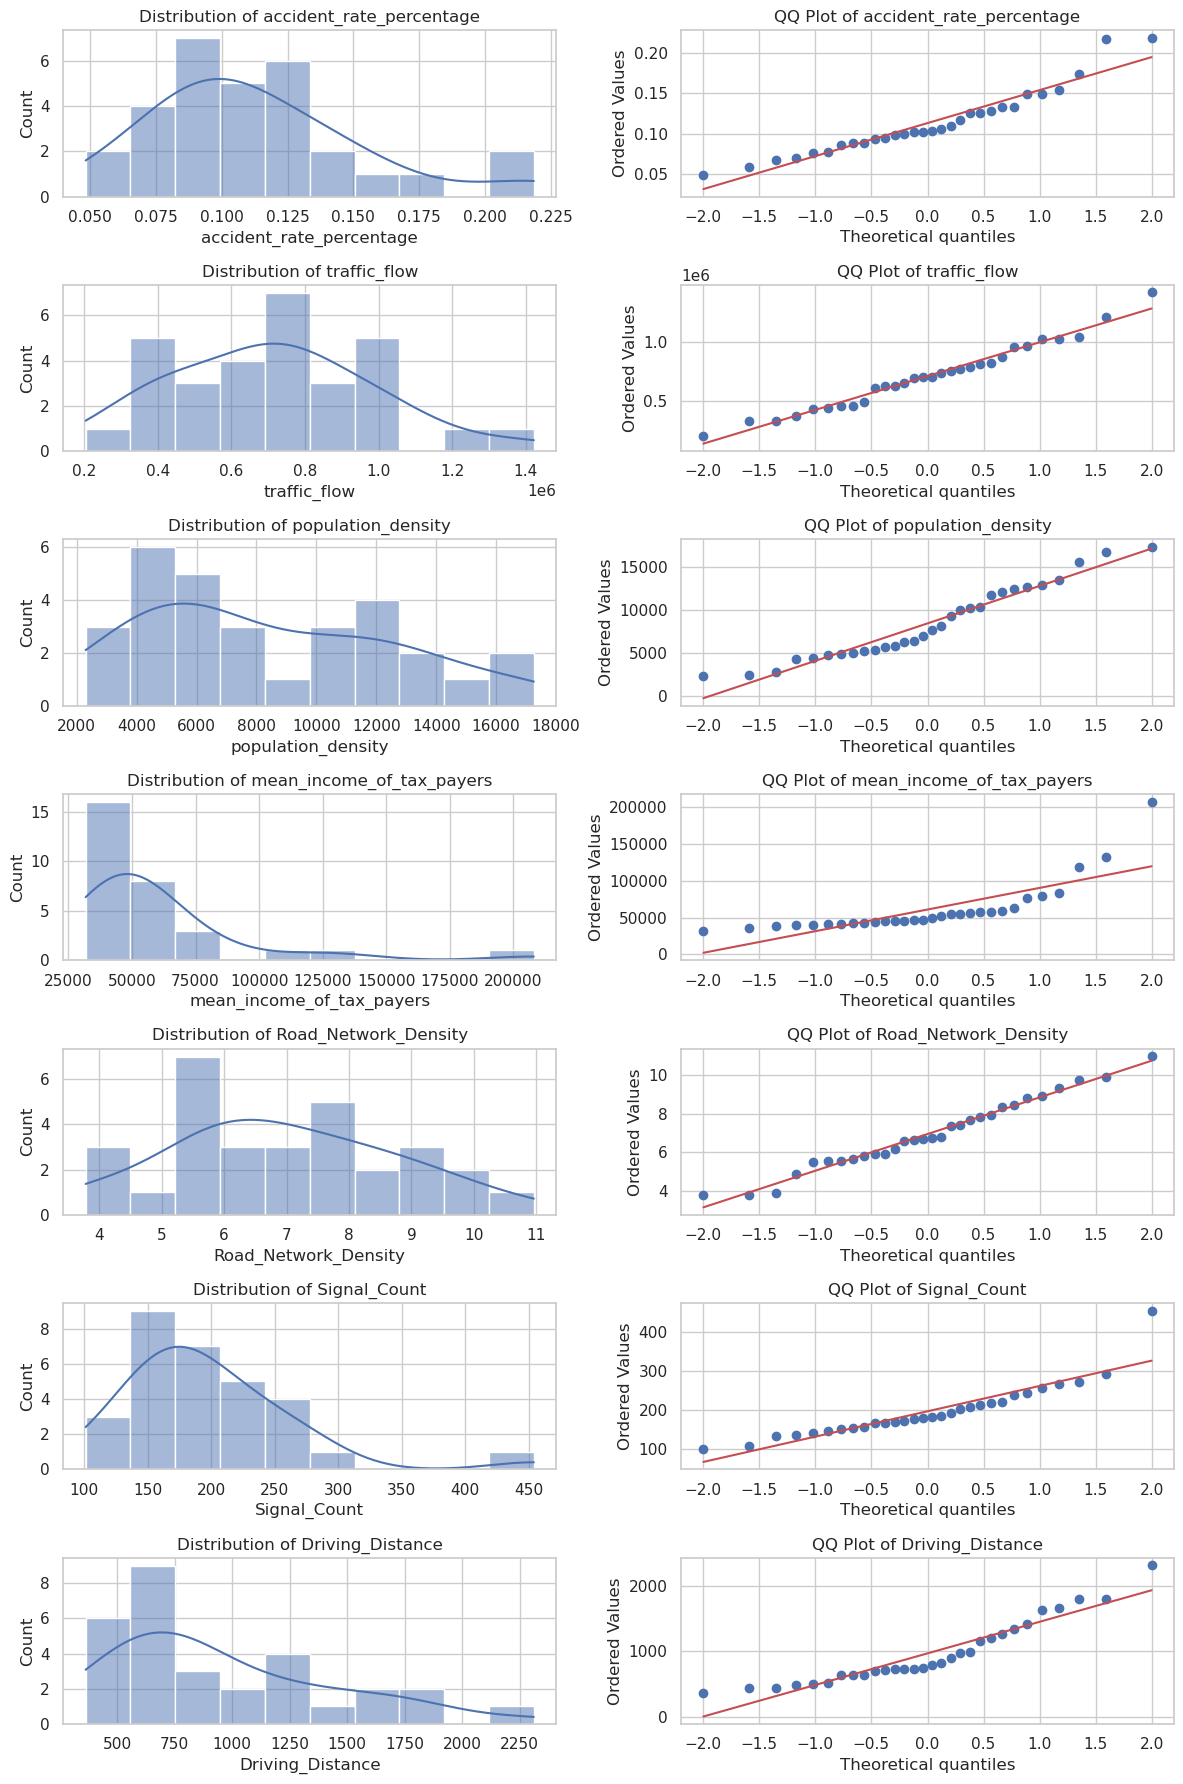

In [9]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')

# 调整布局
plt.tight_layout()
plt.show()

In [10]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9242, p值: 0.0345
accident_rate_percentage 数据不符合正态分布 (拒绝原假设)

traffic_flow - Shapiro-Wilk检验统计量: 0.9773, p值: 0.7490
traffic_flow 数据符合正态分布 (不能拒绝原假设)

population_density - Shapiro-Wilk检验统计量: 0.9392, p值: 0.0868
population_density 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers - Shapiro-Wilk检验统计量: 0.6444, p值: 0.0000
mean_income_of_tax_payers 数据不符合正态分布 (拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9775, p值: 0.7555
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count - Shapiro-Wilk检验统计量: 0.8562, p值: 0.0008
Signal_Count 数据不符合正态分布 (拒绝原假设)

Driving_Distance - Shapiro-Wilk检验统计量: 0.8952, p值: 0.0064
Driving_Distance 数据不符合正态分布 (拒绝原假设)



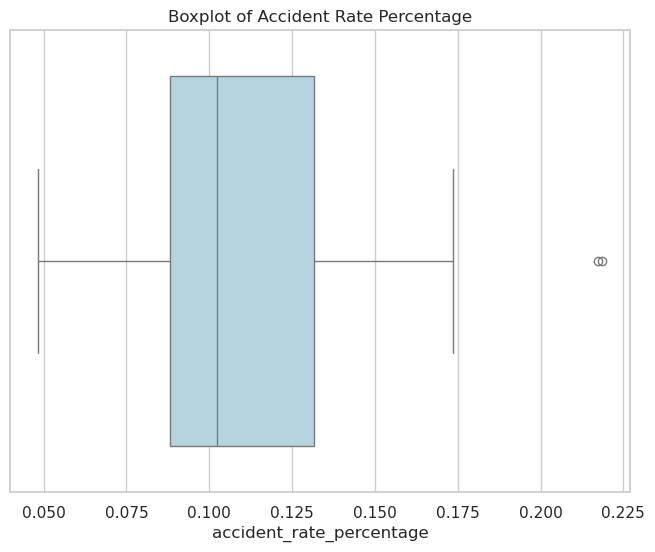

原始数据量: 30
去除因变量异常值后的数据量: 28


In [11]:
# 因变量 'accident_rate_percentage' 的箱型图
plt.figure(figsize=(8, 6))
sns.boxplot(x='accident_rate_percentage', data=df_unique, color="lightblue")
plt.title("Boxplot of Accident Rate Percentage")
plt.show()

# 四分位距法则清理因变量的异常值
Q1 = df_unique['accident_rate_percentage'].quantile(0.25)
Q3 = df_unique['accident_rate_percentage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_unique[(df_unique['accident_rate_percentage'] >= lower_bound) & 
                        (df_unique['accident_rate_percentage'] <= upper_bound)]

print(f"原始数据量: {df_unique.shape[0]}")
print(f"去除因变量异常值后的数据量: {df_filtered.shape[0]}")

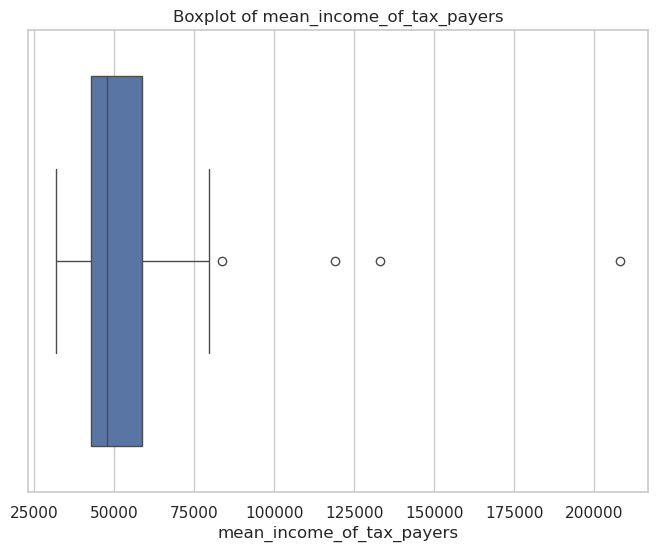

Lower Bound: 18650.0, Upper Bound: 82850.0
原始数据量: 30, 移除异常值后的数据量: 26


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制箱型图
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_unique['mean_income_of_tax_payers'])
plt.title('Boxplot of mean_income_of_tax_payers')
plt.show()

# 计算上下四分位数
Q1 = df_unique['mean_income_of_tax_payers'].quantile(0.25)
Q3 = df_unique['mean_income_of_tax_payers'].quantile(0.75)
IQR = Q3 - Q1  # 四分位距

# 计算上下限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# 移除异常值
df_filtered = df_unique[(df_unique['mean_income_of_tax_payers'] >= lower_bound) &
                        (df_unique['mean_income_of_tax_payers'] <= upper_bound)]

# 打印移除异常值后的数据量
print(f"原始数据量: {len(df_unique)}, 移除异常值后的数据量: {len(df_filtered)}")

In [13]:
df_unique = df_filtered

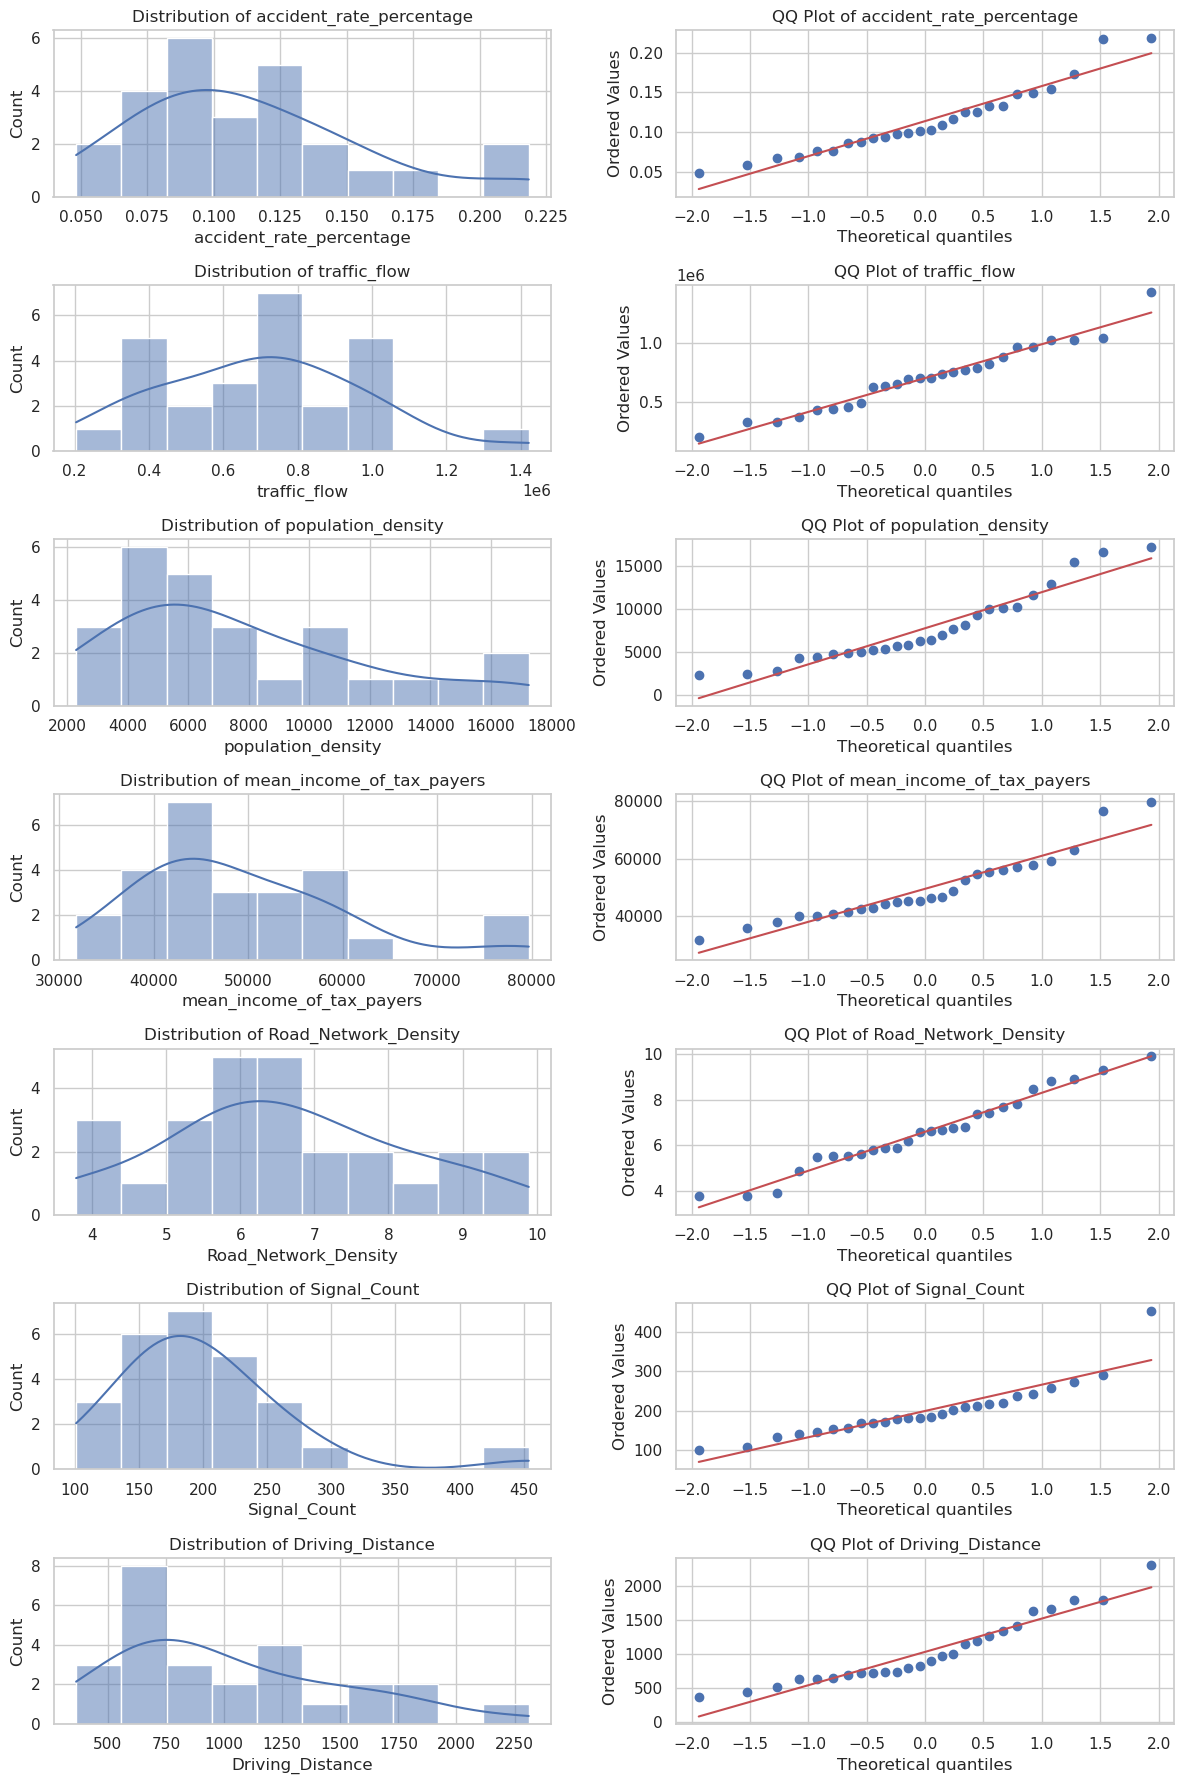

In [14]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')

# 调整布局
plt.tight_layout()
plt.show()

In [15]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
             'mean_income_of_tax_payers', 'Road_Network_Density', 'Signal_Count', 'Driving_Distance']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage - Shapiro-Wilk检验统计量: 0.9309, p值: 0.0813
accident_rate_percentage 数据符合正态分布 (不能拒绝原假设)

traffic_flow - Shapiro-Wilk检验统计量: 0.9699, p值: 0.6208
traffic_flow 数据符合正态分布 (不能拒绝原假设)

population_density - Shapiro-Wilk检验统计量: 0.9054, p值: 0.0207
population_density 数据不符合正态分布 (拒绝原假设)

mean_income_of_tax_payers - Shapiro-Wilk检验统计量: 0.9123, p值: 0.0297
mean_income_of_tax_payers 数据不符合正态分布 (拒绝原假设)

Road_Network_Density - Shapiro-Wilk检验统计量: 0.9692, p值: 0.6038
Road_Network_Density 数据符合正态分布 (不能拒绝原假设)

Signal_Count - Shapiro-Wilk检验统计量: 0.8526, p值: 0.0016
Signal_Count 数据不符合正态分布 (拒绝原假设)

Driving_Distance - Shapiro-Wilk检验统计量: 0.9169, p值: 0.0381
Driving_Distance 数据不符合正态分布 (拒绝原假设)



In [16]:
from scipy import stats

# 选择需要进行 Box-Cox 变换的变量
variables_to_transform = ['accident_rate_percentage', 'traffic_flow', 'population_density', 
                           'Road_Network_Density', 'mean_income_of_tax_payers',
                          'Signal_Count', 'Driving_Distance']

# 遍历每个变量并进行 Box-Cox 变换
for var in variables_to_transform:
    # 去除缺失值并检查正值
    data_cleaned = df_unique[var].dropna()
    
    if (data_cleaned <= 0).any():
        # 如果变量包含非正值，打印警告并跳过
        print(f"Warning: {var} contains non-positive values, skipping Box-Cox transformation.")
    else:
        # 对数据进行 Box-Cox 变换
        transformed_data, lambda_value = stats.boxcox(data_cleaned)
        
        # 使用原始数据的索引，将变换后的数据与原始数据合并
        df_unique.loc[data_cleaned.index, f'{var}_boxcox'] = transformed_data
        
        # 打印变换后的 Lambda 值和数据分布信息
        print(f"{var} 的最佳 Box-Cox λ值: {lambda_value}")

accident_rate_percentage 的最佳 Box-Cox λ值: -0.017347461146592823
traffic_flow 的最佳 Box-Cox λ值: 0.6101184093410541
population_density 的最佳 Box-Cox λ值: 0.08076317704333721
Road_Network_Density 的最佳 Box-Cox λ值: 0.6980219021520441
mean_income_of_tax_payers 的最佳 Box-Cox λ值: -0.8605669393895539
Signal_Count 的最佳 Box-Cox λ值: -0.3593038183024873
Driving_Distance 的最佳 Box-Cox λ值: -0.056285838513443105


In [18]:
import scipy.stats as stats

# 列出需要检验的变量
variables = ['accident_rate_percentage_boxcox', 'traffic_flow_boxcox', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 对每个变量进行Shapiro-Wilk检验
for var in variables:
    # 对数据进行Shapiro-Wilk检验
    stat, p_value = stats.shapiro(df_unique[var].dropna())
    
    # 打印检验结果
    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    
    # 检查p值，判断是否符合正态分布
    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

accident_rate_percentage_boxcox - Shapiro-Wilk检验统计量: 0.9878, p值: 0.9848
accident_rate_percentage_boxcox 数据符合正态分布 (不能拒绝原假设)

traffic_flow_boxcox - Shapiro-Wilk检验统计量: 0.9790, p值: 0.8524
traffic_flow_boxcox 数据符合正态分布 (不能拒绝原假设)

population_density_boxcox - Shapiro-Wilk检验统计量: 0.9696, p值: 0.6143
population_density_boxcox 数据符合正态分布 (不能拒绝原假设)

mean_income_of_tax_payers_boxcox - Shapiro-Wilk检验统计量: 0.9827, p值: 0.9251
mean_income_of_tax_payers_boxcox 数据符合正态分布 (不能拒绝原假设)

Road_Network_Density_boxcox - Shapiro-Wilk检验统计量: 0.9691, p值: 0.5994
Road_Network_Density_boxcox 数据符合正态分布 (不能拒绝原假设)

Signal_Count_boxcox - Shapiro-Wilk检验统计量: 0.9815, p值: 0.9037
Signal_Count_boxcox 数据符合正态分布 (不能拒绝原假设)

Driving_Distance_boxcox - Shapiro-Wilk检验统计量: 0.9770, p值: 0.8049
Driving_Distance_boxcox 数据符合正态分布 (不能拒绝原假设)



In [19]:
df_unique.head()

,traffic_flow,population_density,mean_income_of_tax_payers,Road_Network_Density,Signal_Count,Driving_Distance,accident_rate_percentage,accident_rate_percentage_boxcox,traffic_flow_boxcox,population_density_boxcox,Road_Network_Density_boxcox,mean_income_of_tax_payers_boxcox,Signal_Count_boxcox,Driving_Distance_boxcox
0,332152,6286.4,31800.0,5.896200,454.0,634,0.133072,-2.052566,3828.858096,12.711410,3.510569,1.161870,2.474239,5.410316
442,1421345,4821.9,59100.0,5.486005,243.0,1666,0.058325,-2.912934,9297.893259,12.179627,3.267923,1.161934,2.396454,6.064294
1271,817061,4295.6,38000.0,5.645334,169.0,995,0.048344,-3.110428,6632.142589,11.951428,3.362802,1.161892,2.342554,5.719820
1666,701496,8112.3,44100.0,6.668517,181.0,970,0.133144,-2.052002,6042.764720,13.233540,3.954063,1.161908,2.353282,5.702553
2600,631376,2299.4,54500.0,3.781264,257.0,1409,0.094714,-2.405741,5666.603203,10.753747,2.192599,1.161927,2.404159,5.953416


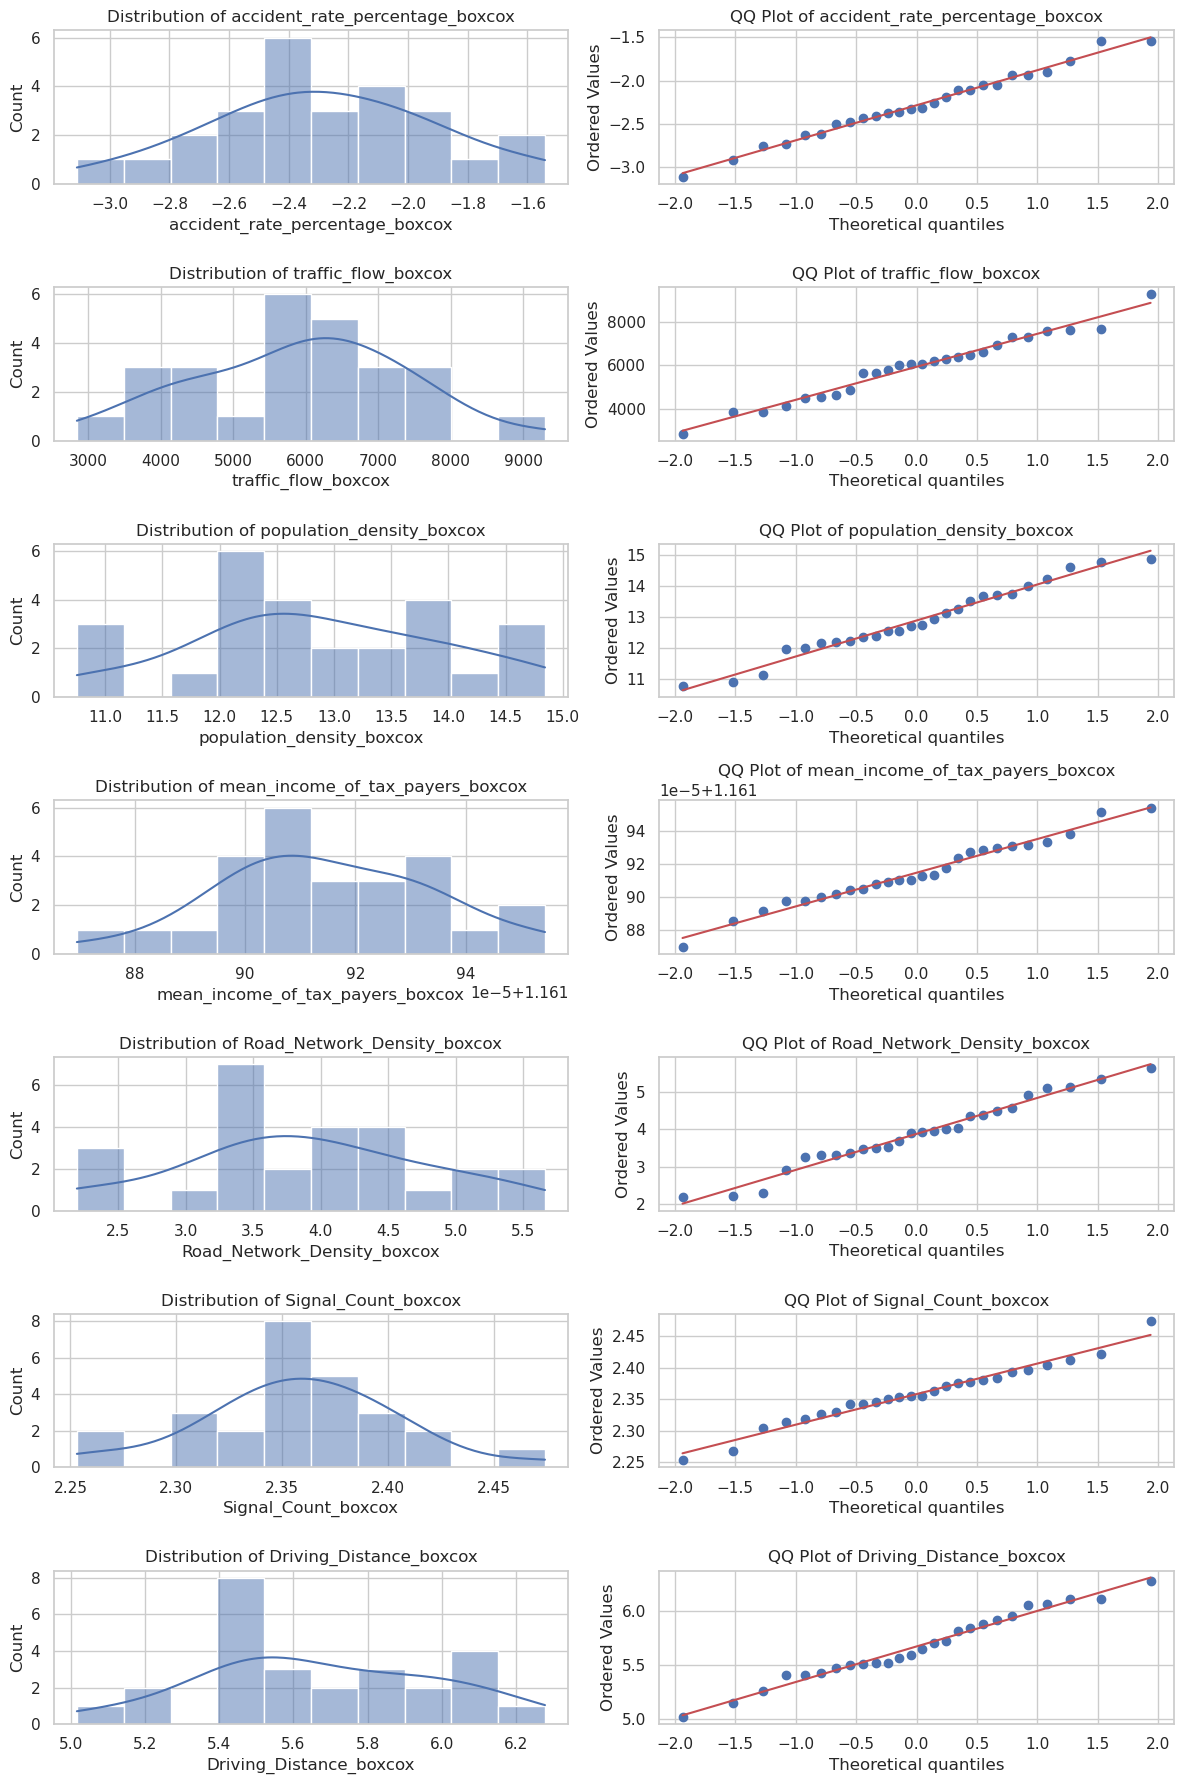

In [20]:
# 设置图形风格
sns.set(style="whitegrid")

# 设置图的大小
plt.figure(figsize=(12, 18))  # 增大高度以便显示所有7个变量

# 绘制各个变量的直方图和QQ图
variables = ['accident_rate_percentage_boxcox', 'traffic_flow_boxcox', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制直方图和QQ图
for i, var in enumerate(variables, 1):
    plt.subplot(7, 2, 2*i - 1)  # 绘制每个变量的直方图
    sns.histplot(df_unique[var].dropna(), kde=True, bins=10)
    plt.title(f'Distribution of {var}')
    
    plt.subplot(7, 2, 2*i)  # 绘制每个变量的QQ图
    stats.probplot(df_unique[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}')

# 调整布局
plt.tight_layout()
plt.show()

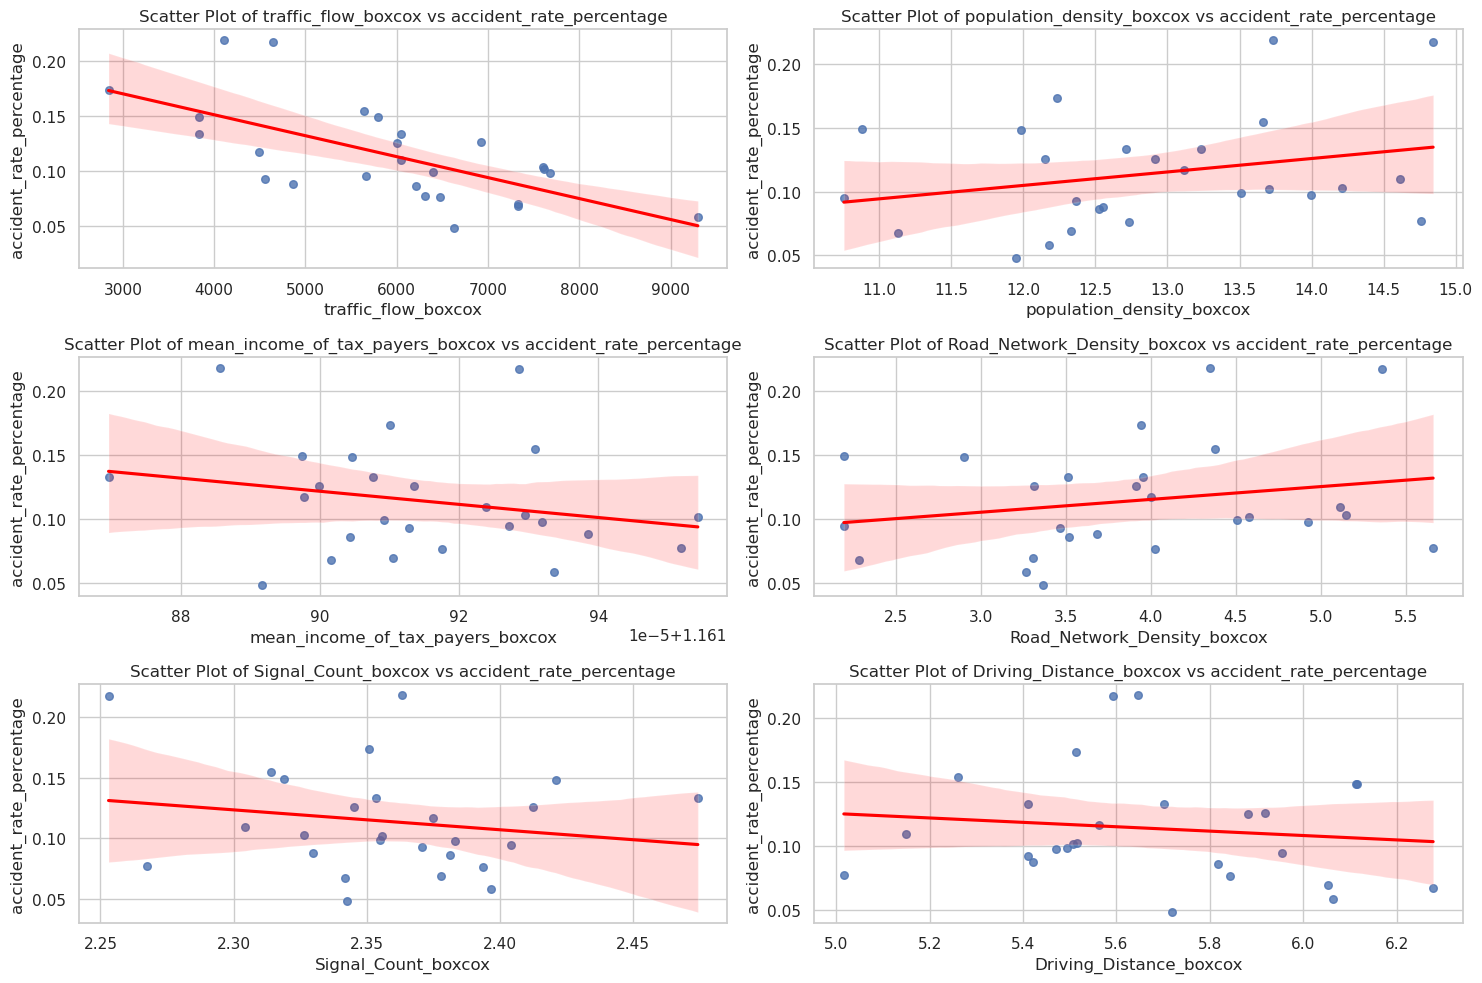

In [21]:
# 设置图形风格
sns.set(style="whitegrid")

# 创建一个大的图形，以便绘制多个子图
plt.figure(figsize=(15, 10))

# 自变量列表
variables = ['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 循环绘制每个自变量与因变量的散点图和拟合线
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # 2行3列布局
    sns.regplot(x=var, y='accident_rate_percentage', data=df_unique, scatter_kws={'s': 30}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot of {var} vs accident_rate_percentage')
    
# 调整布局
plt.tight_layout()
plt.show()

In [ ]:
df = df_unique[['accident_rate_percentage_boxcox','traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
             'Road_Network_Density_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox'] ]
df.info()

In [ ]:
df.head()

In [ ]:
correlation_matrix = df.corr()
# 绘制相关性矩阵的热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 选择需要计算VIF的自变量（去掉因变量 accident_rate_percentage）
variables = ['traffic_flow_boxcox', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 'Road_Network_Density_boxcox', 
             'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

In [ ]:
import statsmodels.api as sm

# 准备因变量和自变量
y = df['accident_rate_percentage_boxcox']
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density_boxcox', 'Signal_Count_boxcox', 'Driving_Distance_boxcox']]

# 在模型中加入常数项
X = sm.add_constant(X)

# 1. 当前模型的R-squared
model_full = sm.OLS(y, X).fit()
r_squared_full = model_full.rsquared
print(f"当前模型的R-squared: {r_squared_full}")

# 2. 去除 'population_density_boxcox' 后的模型
X_no_population_density = X.drop(columns=['population_density_boxcox'])
model_no_population_density = sm.OLS(y, X_no_population_density).fit()
r_squared_no_population_density = model_no_population_density.rsquared
print(f"去除 'population_density_boxcox' 后的R-squared: {r_squared_no_population_density}")

# 3. 去除 'Road_Network_Density_boxcox' 后的模型
X_no_road_network_density = X.drop(columns=['Road_Network_Density_boxcox'])
model_no_road_network_density = sm.OLS(y, X_no_road_network_density).fit()
r_squared_no_road_network_density = model_no_road_network_density.rsquared
print(f"去除 'Road_Network_Density_boxcox' 后的R-squared: {r_squared_no_road_network_density}")

In [ ]:
df_dropped = df.drop(columns=['Road_Network_Density_boxcox'])

In [ ]:
# 选择需要计算VIF的自变量（去掉因变量 accident_rate_percentage）
variables = ['traffic_flow_boxcox', 'population_density_boxcox', 
             'mean_income_of_tax_payers_boxcox', 
             'Signal_Count_boxcox', 'Driving_Distance_boxcox']

# 从df中选择自变量数据
X = df[variables]

# 为计算VIF添加常数列（截距项）
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

In [ ]:
import statsmodels.api as sm

# 准备因变量和自变量
y = df['accident_rate_percentage_boxcox']
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Signal_Count_boxcox', 'Driving_Distance_boxcox']]

# 在模型中加入常数项
X = sm.add_constant(X)

# 1. 当前模型的R-squared
model_full = sm.OLS(y, X).fit()
r_squared_full = model_full.rsquared
print(f"当前模型的R-squared: {r_squared_full}")

# 2. 去除 'population_density_boxcox' 后的模型
X_no_population_density = X.drop(columns=['population_density_boxcox'])
model_no_population_density = sm.OLS(y, X_no_population_density).fit()
r_squared_no_population_density = model_no_population_density.rsquared
print(f"去除 'population_density_boxcox' 后的R-squared: {r_squared_no_population_density}")

# 3. 去除 'Driving_Distance_boxcox' 后的模型
X_no_driving_distance = X.drop(columns=['Driving_Distance_boxcox'])
model_no_driving_distance = sm.OLS(y, X_no_driving_distance).fit()
r_squared_no_driving_distance = model_no_driving_distance.rsquared
print(f"去除 'Driving_Distance_boxcox' 后的R-squared: {r_squared_no_driving_distance}")

In [ ]:
df = df.drop(columns=['Driving_Distance_boxcox'])

In [ ]:
df.info()

In [ ]:
# 准备数据
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density_boxcox', 'Signal_Count_boxcox']]

# 为VIF计算添加常数项
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

In [ ]:
import statsmodels.api as sm

# 准备因变量和自变量
y = df['accident_rate_percentage_boxcox']
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Road_Network_Density_boxcox', 'Signal_Count_boxcox']]

# 在模型中加入常数项
X = sm.add_constant(X)

# 1. 当前模型的R-squared
model_full = sm.OLS(y, X).fit()
r_squared_full = model_full.rsquared
print(f"当前模型的R-squared: {r_squared_full}")

# 2. 去除 'population_density_boxcox' 后的模型
X_no_population_density = X.drop(columns=['population_density_boxcox'])
model_no_population_density = sm.OLS(y, X_no_population_density).fit()
r_squared_no_population_density = model_no_population_density.rsquared
print(f"去除 'population_density_boxcox' 后的R-squared: {r_squared_no_population_density}")

# 3. 去除 'Driving_Distance_boxcox' 后的模型
X_no_Road_Network_Density_boxcox = X.drop(columns=['Road_Network_Density_boxcox'])
model_no_Road_Network_Density_boxcox = sm.OLS(y, X_no_Road_Network_Density_boxcox).fit()
r_squared_no_Road_Network_Density_boxcox = model_no_Road_Network_Density_boxcox.rsquared
print(f"去除 'Road_Network_Density_boxcox' 后的R-squared: {r_squared_no_Road_Network_Density_boxcox}")

In [ ]:
df = df.drop(columns=['Road_Network_Density_boxcox'])
df.info()

In [ ]:
# 准备数据
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
         'Signal_Count_boxcox']]

# 为VIF计算添加常数项
X_with_const = add_constant(X)

# 计算VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# 打印VIF结果
print(vif_data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# 1. 准备数据
X = df.drop(columns=['accident_rate_percentage_boxcox'])
y = df['accident_rate_percentage_boxcox']

# 2. 标准化自变量
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 使用LassoCV来计算不同alpha值下的路径
lasso = LassoCV(cv=5, max_iter=10000)
lasso.fit(X_scaled, y)

# 获取路径
alphas_lasso, coefs_lasso, _ = lasso.path(X_scaled, y)

# 4. 绘制Lasso路径图
plt.figure(figsize=(10, 6))
ax = plt.gca()

# 绘制每个变量的系数路径
for i in range(X.shape[1]):
    ax.plot(alphas_lasso, coefs_lasso[i, :], label=X.columns[i])

ax.plot(alphas_lasso, coefs_lasso[-1, :], label="Intercept", linestyle="--", color="black", alpha = 0.5)

# 设置图形
ax.set_xscale('log')  # x轴是log尺度
ax.set_xlabel("Alpha (log scale)")
ax.set_ylabel("Coefficients")
ax.set_title("Lasso Path (Coefficient vs Alpha)")

# 添加图例
plt.legend()
plt.axis('tight')
plt.show()

# 5. 输出Lasso回归的最佳alpha和系数
print(f"最佳alpha: {lasso.alpha_}")
print(f"系数: {lasso.coef_}")

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# 准备数据
X = df[['traffic_flow_boxcox', 'population_density_boxcox', 'mean_income_of_tax_payers_boxcox', 
        'Signal_Count_boxcox']]
y = df['accident_rate_percentage_boxcox']

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso回归
lasso = Lasso(alpha=0.001)  # 调整 alpha 以获得合适的正则化力度
lasso.fit(X_scaled, y)

# 获取非零系数及变量名称
coef = lasso.coef_
features = X.columns

# 创建系数表
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# 绘制条形图
plt.figure(figsize=(8,4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Lasso Regression Non-zero Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()